# Replication of the European Commission Debt Sustainability Methodology

This notebook features an updated version of the methodology introduced in "A Quantitative Evaluation of the European Commission´s Fiscal Governance Proposal" by Zsolt Darvas, Lennard Welslau, and Jeromin Zettelmeyer (2023). For details on the methodology and a guide to the features of the python code see "tutorial.ipynb".

All input data needed to run the model are pre-prepared and can be found in the data/InputData folder. Data sources in the "SOURCES.xlsx" file.

For comments and suggestions please contact lennard.welslau[at]gmail[dot]com. \
Last update: 01 June 2024

## Run DSA 

In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.3f}".format
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Import DSA model class and stochastic subclass
from classes import *
from functions import *

# Set autoreleoad
%load_ext autoreload
%autoreload 2

In [2]:
# List of EU codes and countries for loop and chart titles
country_code_dict = {
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'BGR': 'Bulgaria',
    'HRV': 'Croatia',
    'CYP': 'Cyprus',
    'CZE': 'Czechia',
    'DNK': 'Denmark',
    'EST': 'Estonia',
    'FIN': 'Finland',
    'FRA': 'France',
    'DEU': 'Germany',
    'GRC': 'Greece',
    'HUN': 'Hungary',
    'IRL': 'Ireland',
    'ITA': 'Italy',
    'LVA': 'Latvia',
    'LTU': 'Lithuania',
    'LUX': 'Luxembourg',
    'MLT': 'Malta',
    'NLD': 'Netherlands',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'ROU': 'Romania',
    'SVK': 'Slovakia',
    'SVN': 'Slovenia',
    'ESP': 'Spain',
    'SWE': 'Sweden',
    }
country_codes = list(country_code_dict.keys())
adjustment_periods = [4, 7]

# Create output folder
folder_name = 'june_update'
add_output_folder(folder_name)

# Initialize results dictionary
results_dict = create_results_dict(country_codes)

# If there already is a results file, we can load it using the function below
#results_dict = load_dsa_dict(folder_name)

In [5]:
# Call functions to run DSA, each instance is solved and saved as pickle on the hard drive
run_dsa(country_codes, 
        adjustment_periods, 
        results_dict,
        folder_name, 
        edp=True, 
        debt_safeguard=True, 
        deficit_resilience=True,
        deficit_resilience_post_adjustment=True
)

# Save SPB and dataframes as excel files
save_results(results_dict, folder_name)


--> 1 of 27, estimated remaining time: 0.0 minutes

________________________ Optimizing AUT 4-year ________________________
SPB*: 0.7828999999998325 (adverse_r_g)
EDP not binding
Debt safeguard not binding
Deficit resilience safeguard not binding during adjustment period
SPB post-adjustment: 0.4813698485380056

________________________ Optimizing AUT 7-year ________________________
SPB*: 0.5512999999998323 (adverse_r_g)
EDP not binding
Debt safeguard not binding
SPB* after deficit resilience: 0.5512999999998323
SPB post-adjustment: 0.5743662984691744

--> 2 of 27, estimated remaining time: 8.3 minutes

________________________ Optimizing BEL 4-year ________________________
SPB*: 1.0937999999998325 (adverse_r_g)
EDP not binding
Debt safeguard not binding
Deficit resilience safeguard not binding during adjustment period
SPB post-adjustment: 1.2113223514520146

________________________ Optimizing BEL 7-year ________________________
SPB*: 1.1360999999998327 (adverse_r_g)
EDP not binding
D

### Create country plots

No quarterly shock data available for CYP, using annual data instead.
No quarterly shock data available for CYP, using annual data instead.
No quarterly shock data available for GRC, using annual data instead.
No quarterly shock data available for GRC, using annual data instead.
No quarterly shock data available for ITA, using annual data instead.
No quarterly shock data available for ITA, using annual data instead.
Creating chart for AUT_4
Creating chart for AUT_7


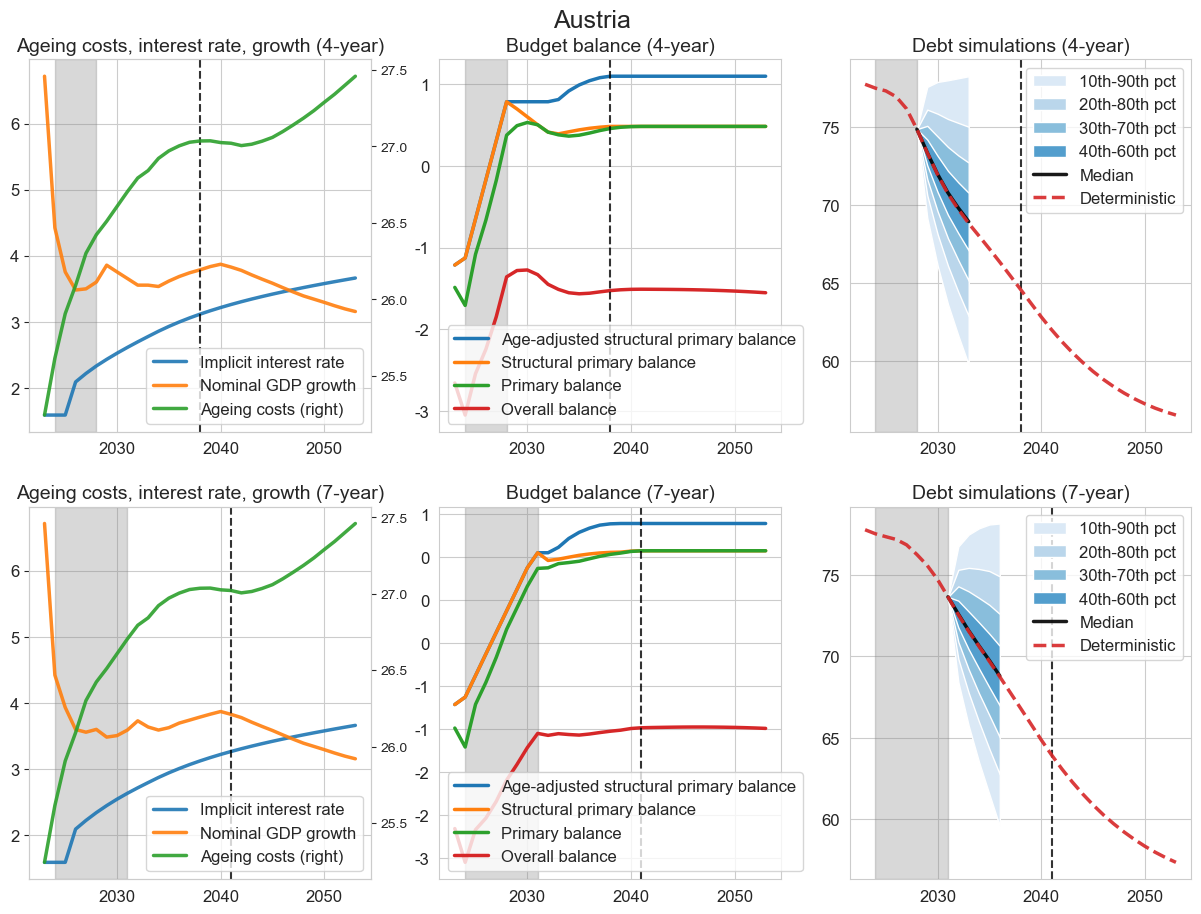

Creating chart for BEL_4
Creating chart for BEL_7


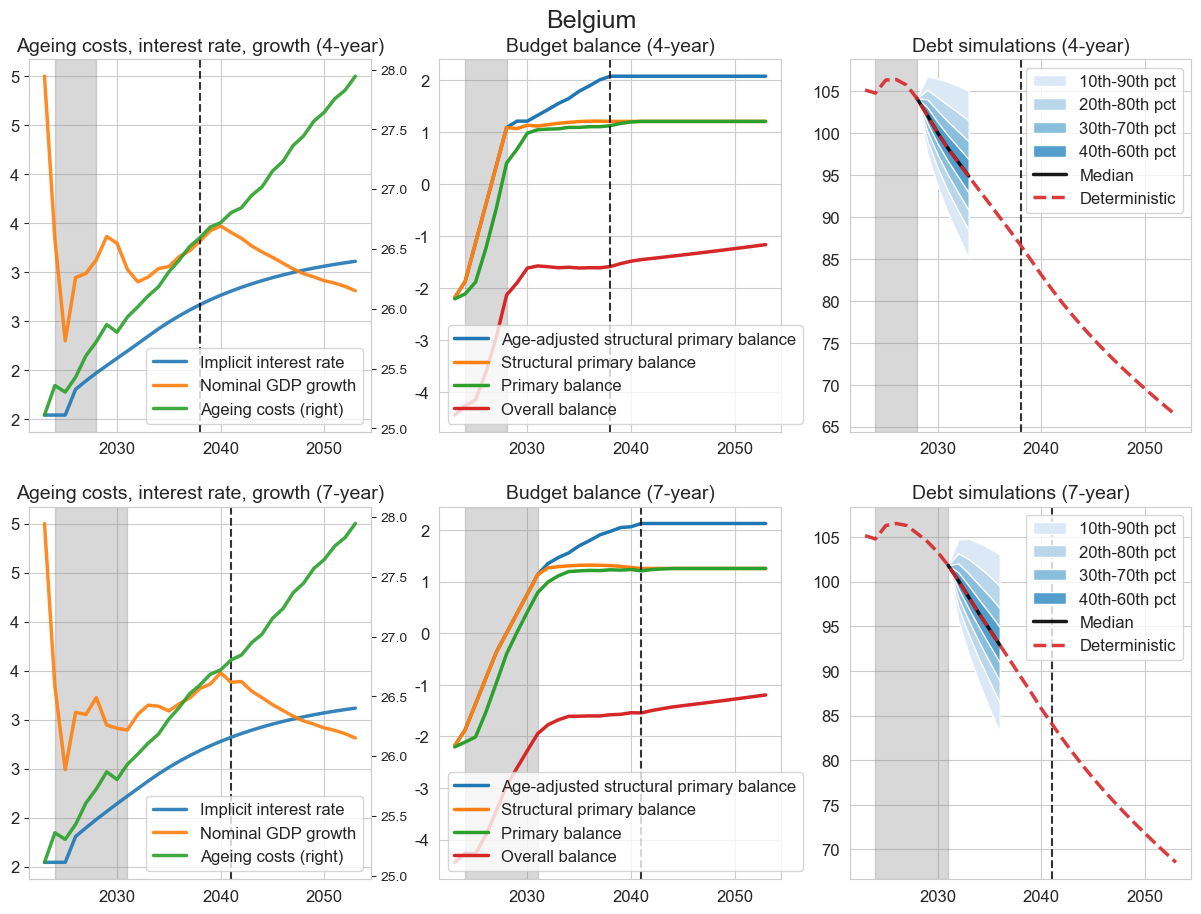

Creating chart for BGR_4
Creating chart for BGR_7


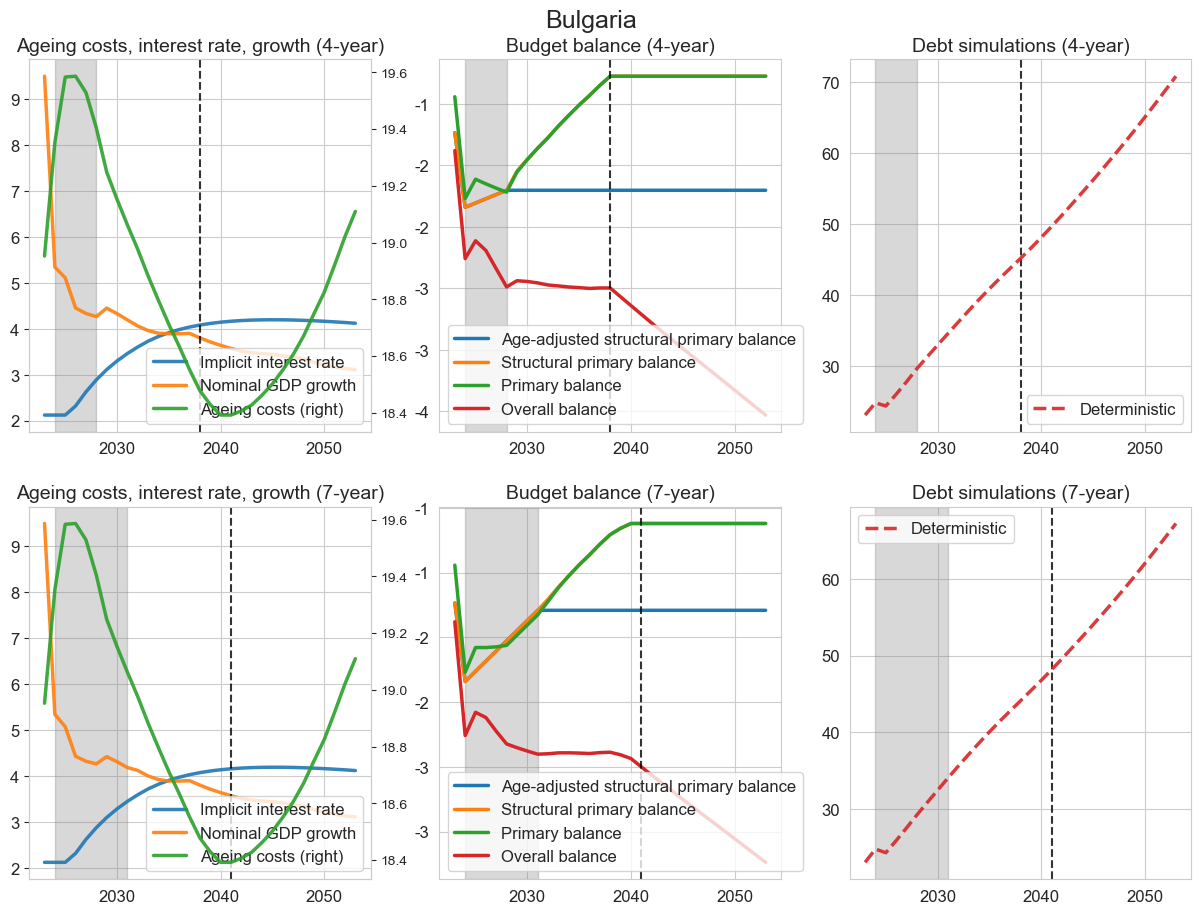

Creating chart for HRV_4
Creating chart for HRV_7


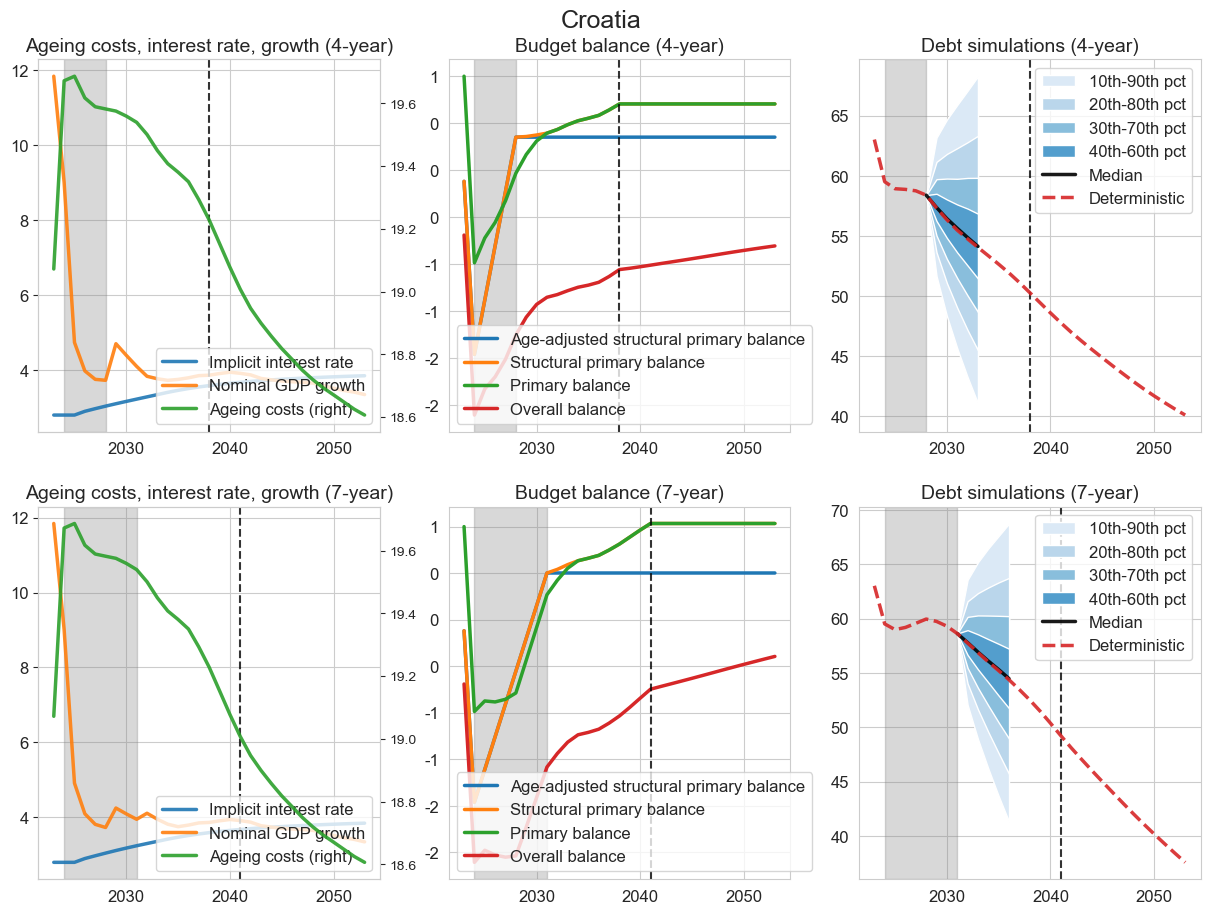

Creating chart for CYP_4
Creating chart for CYP_7


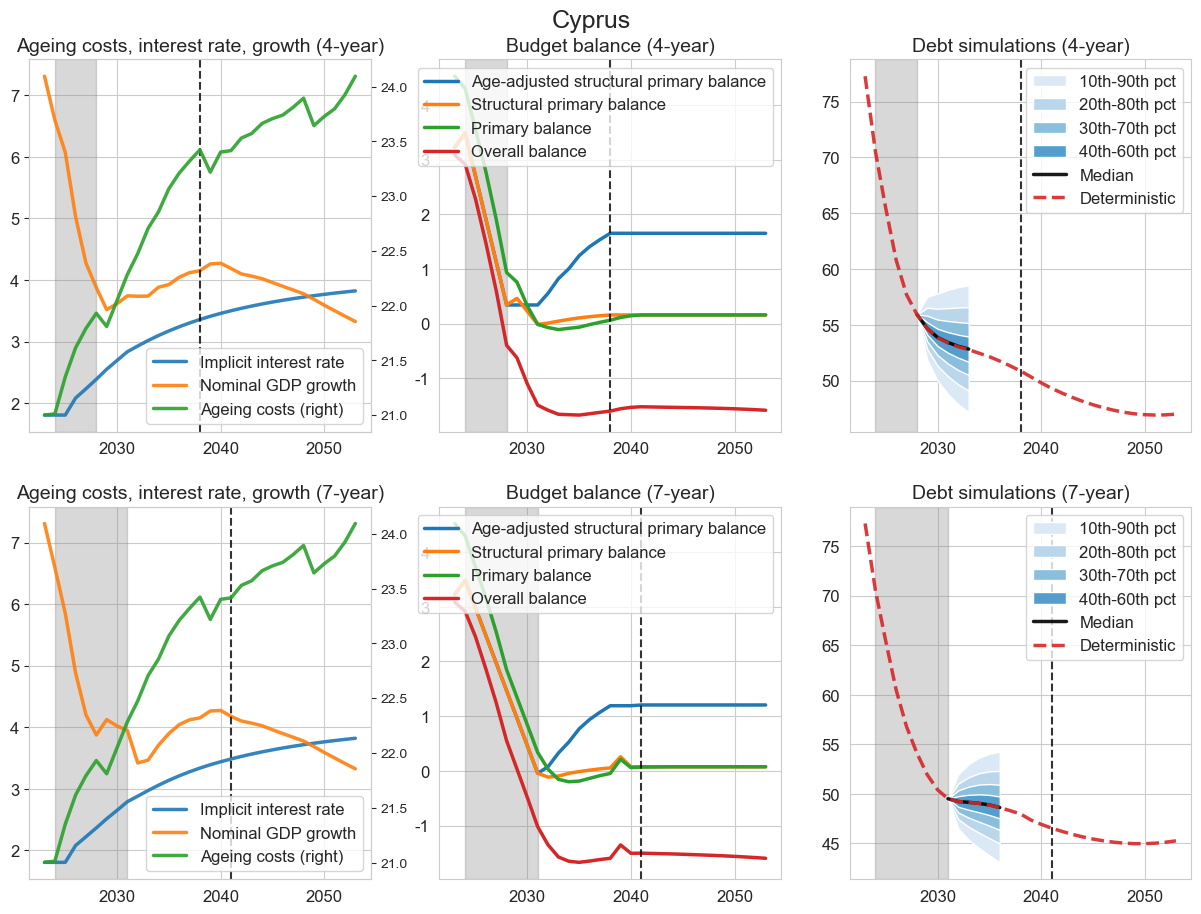

Creating chart for CZE_4
Creating chart for CZE_7


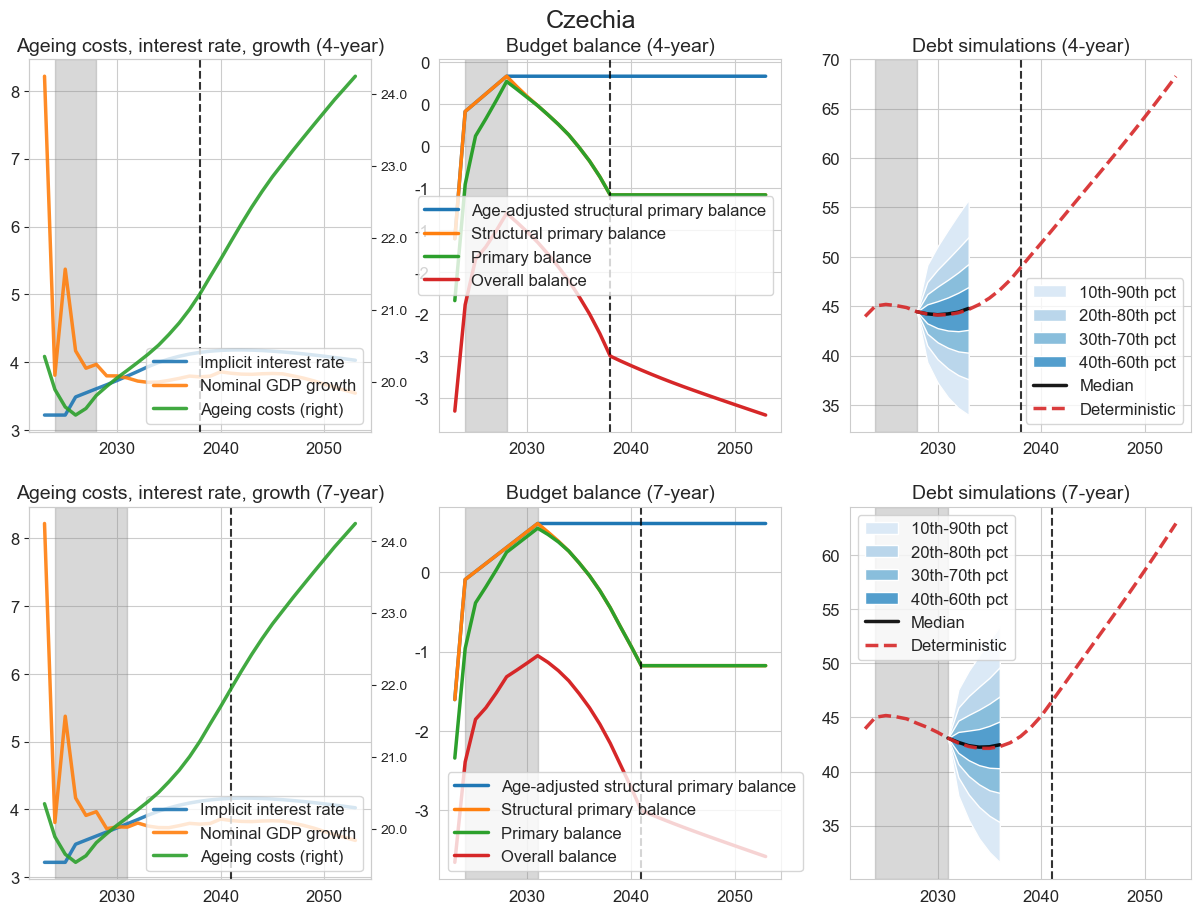

Creating chart for DNK_4
Creating chart for DNK_7


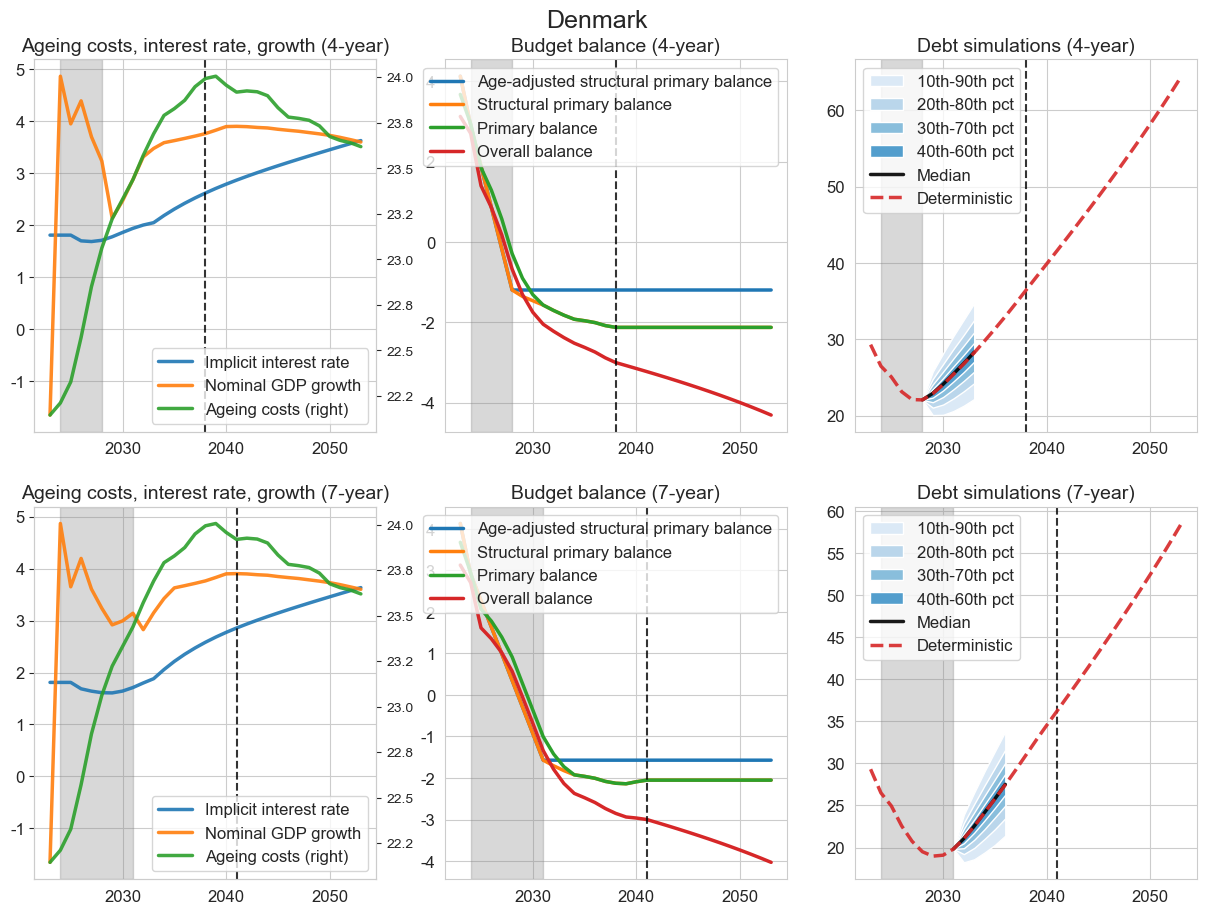

Creating chart for EST_4
Creating chart for EST_7


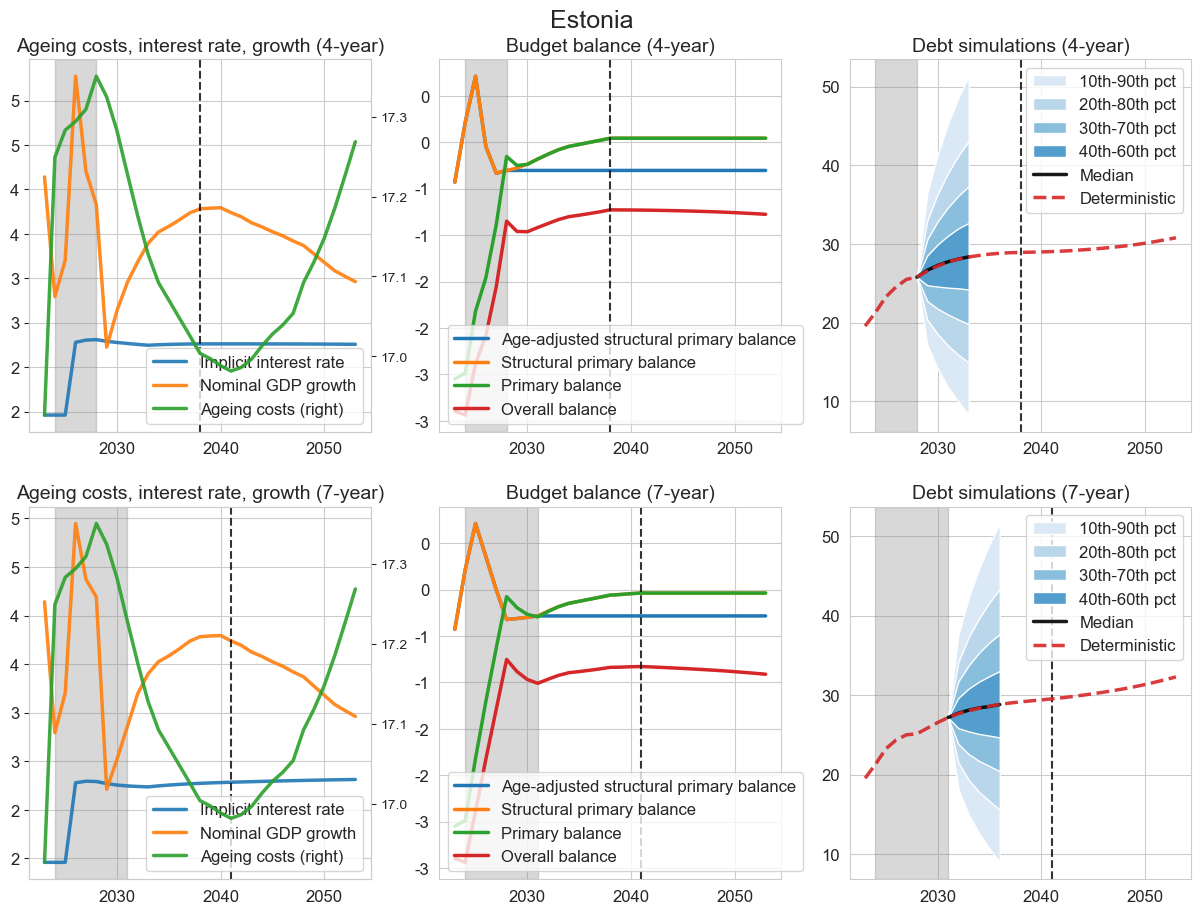

Creating chart for FIN_4
Creating chart for FIN_7


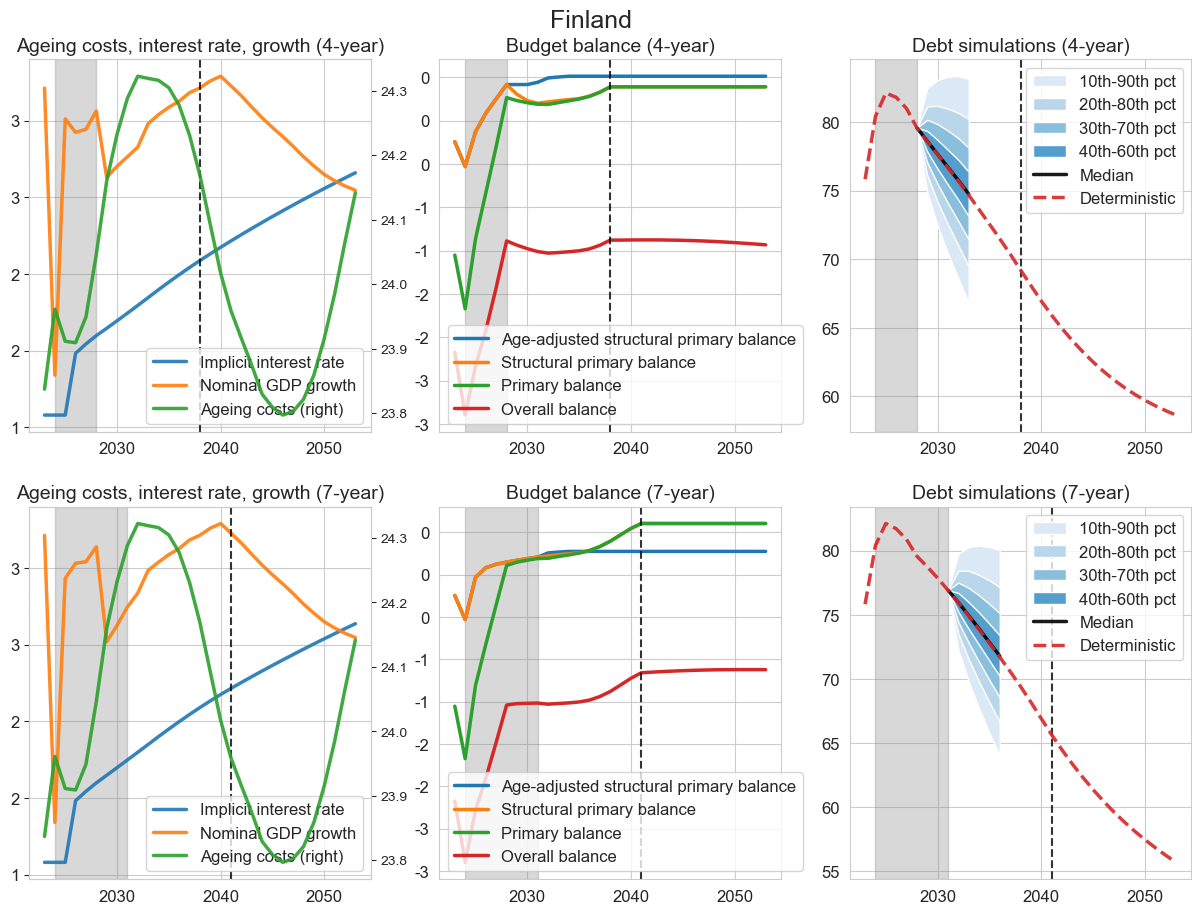

Creating chart for FRA_4
Creating chart for FRA_7


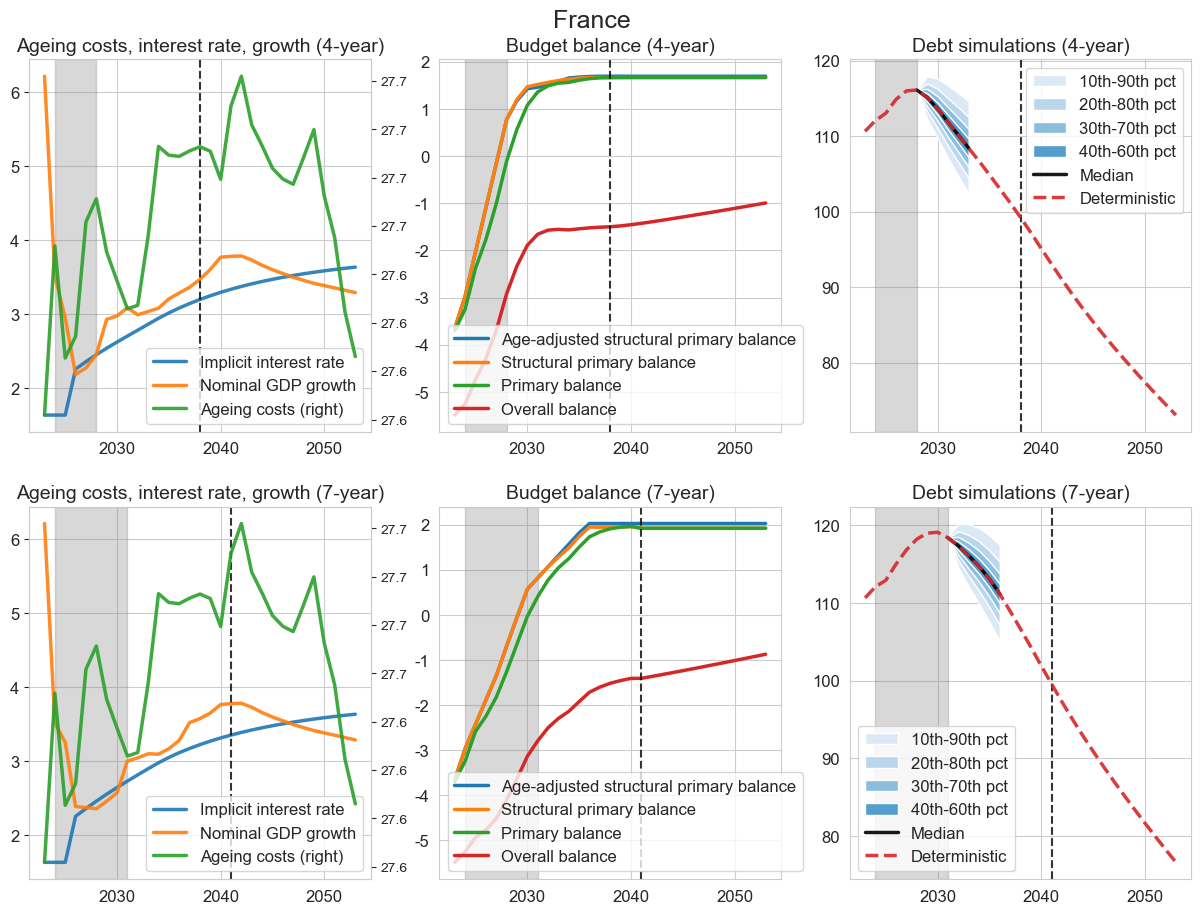

Creating chart for DEU_4
Creating chart for DEU_7


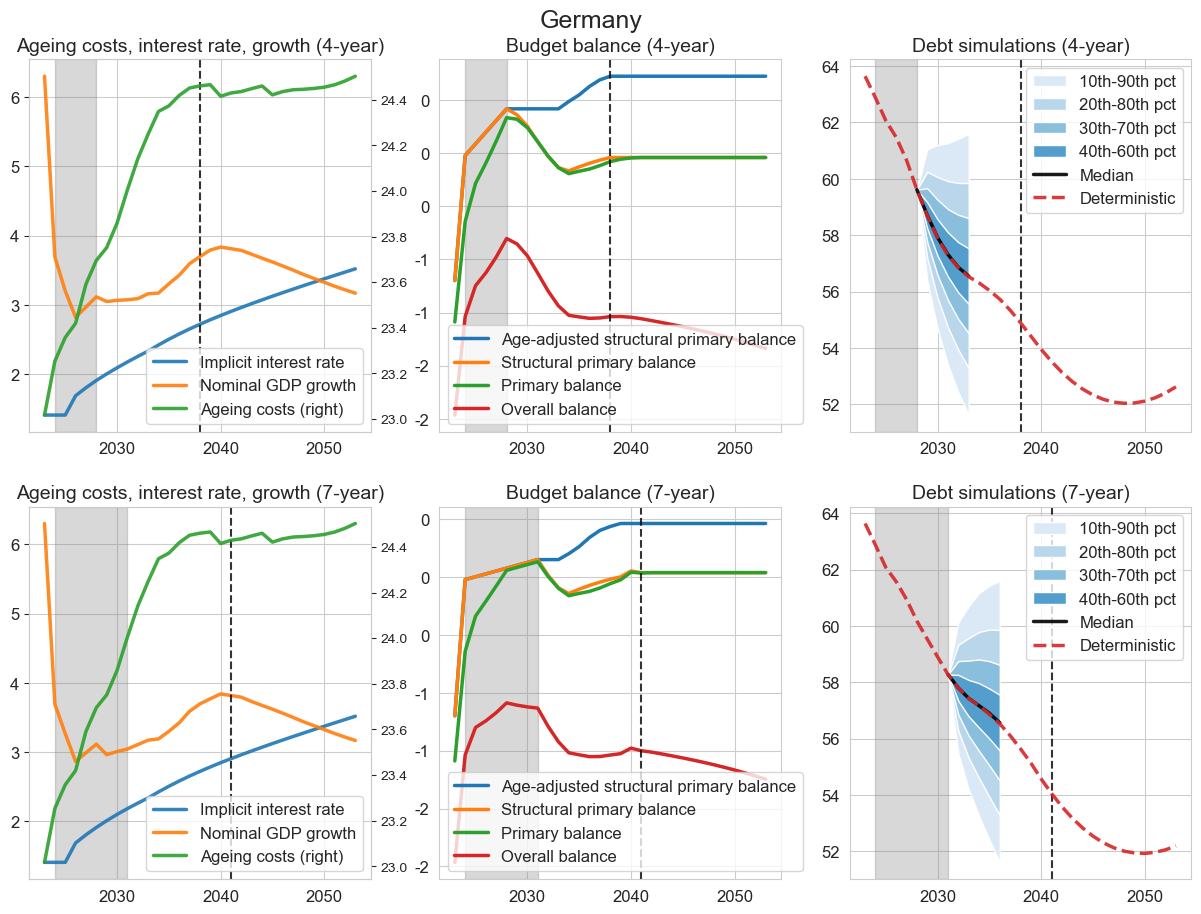

Creating chart for GRC_4
Creating chart for GRC_7


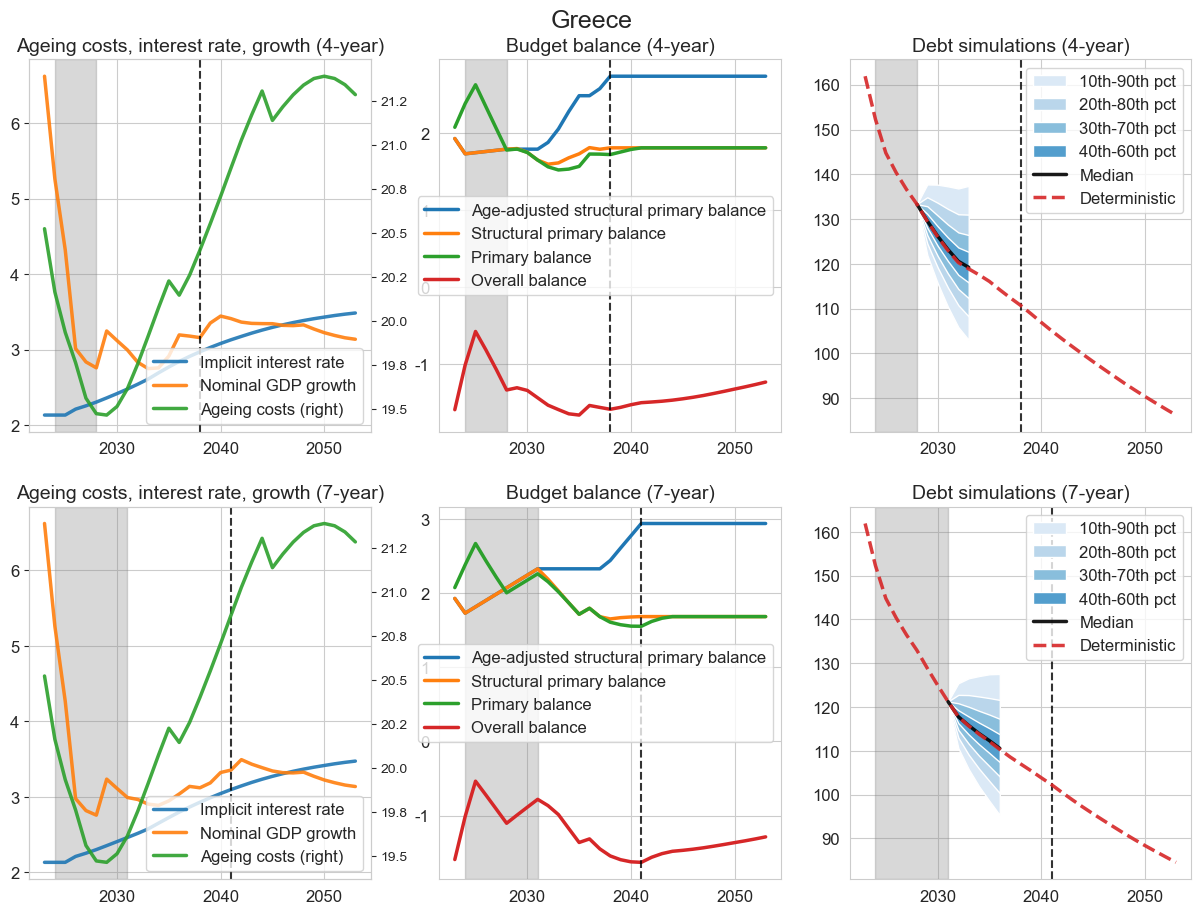

Creating chart for HUN_4
Creating chart for HUN_7


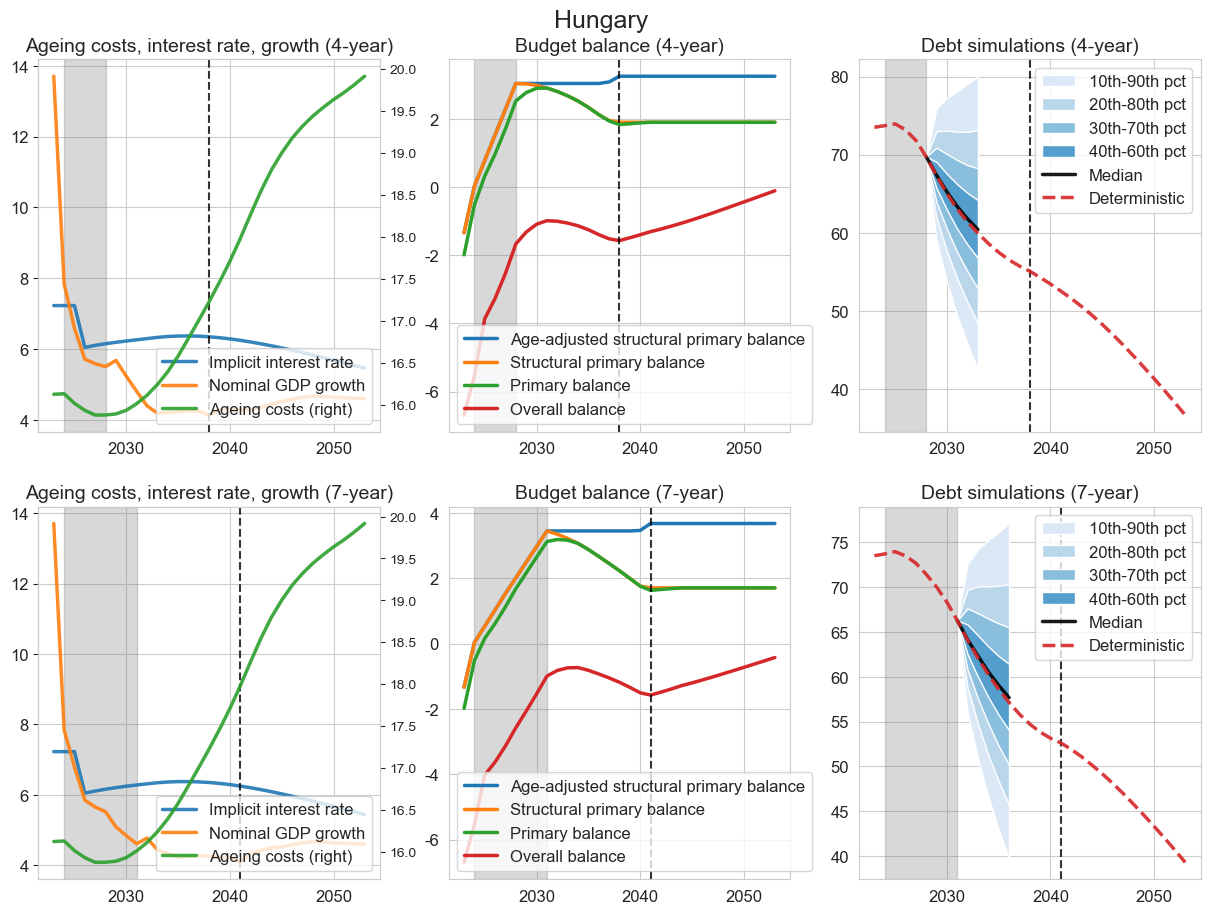

Creating chart for IRL_4
Creating chart for IRL_7


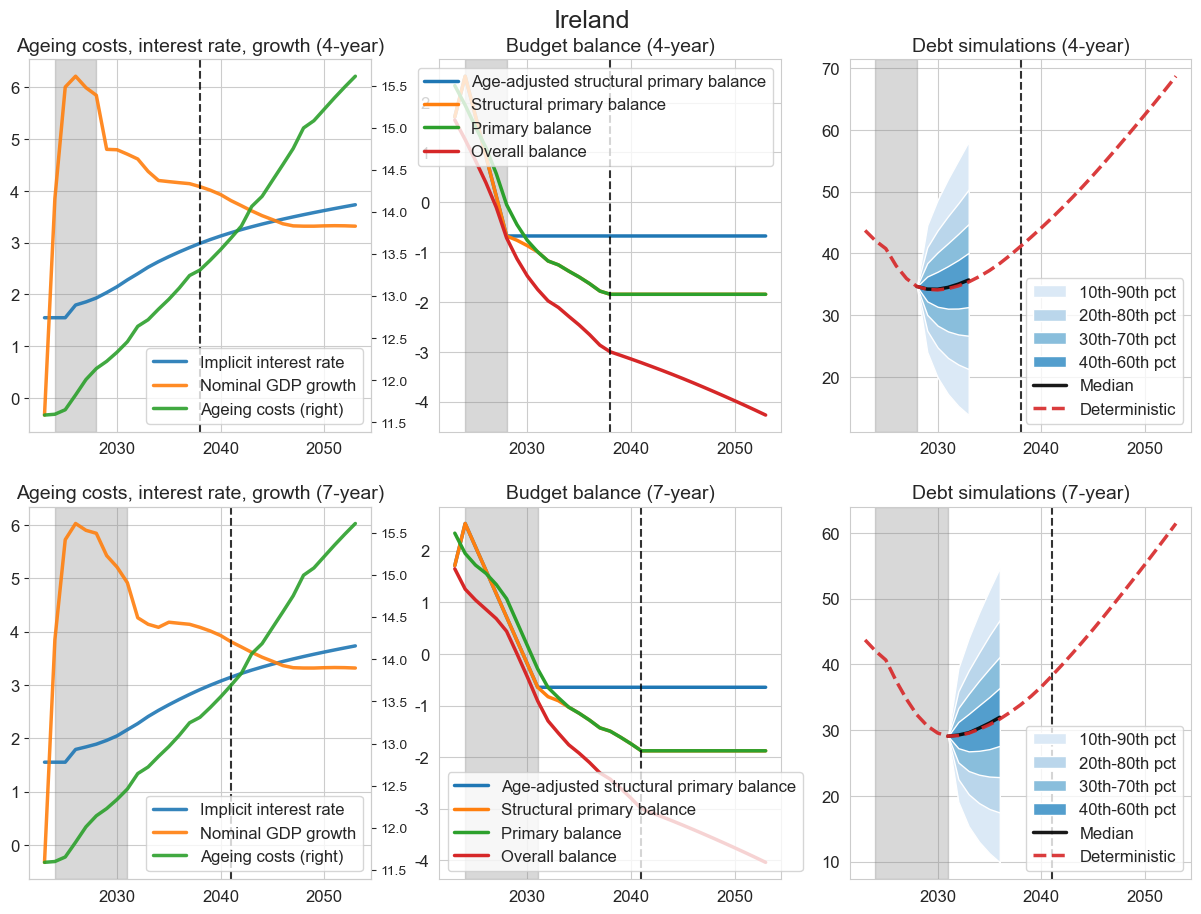

Creating chart for ITA_4
Creating chart for ITA_7


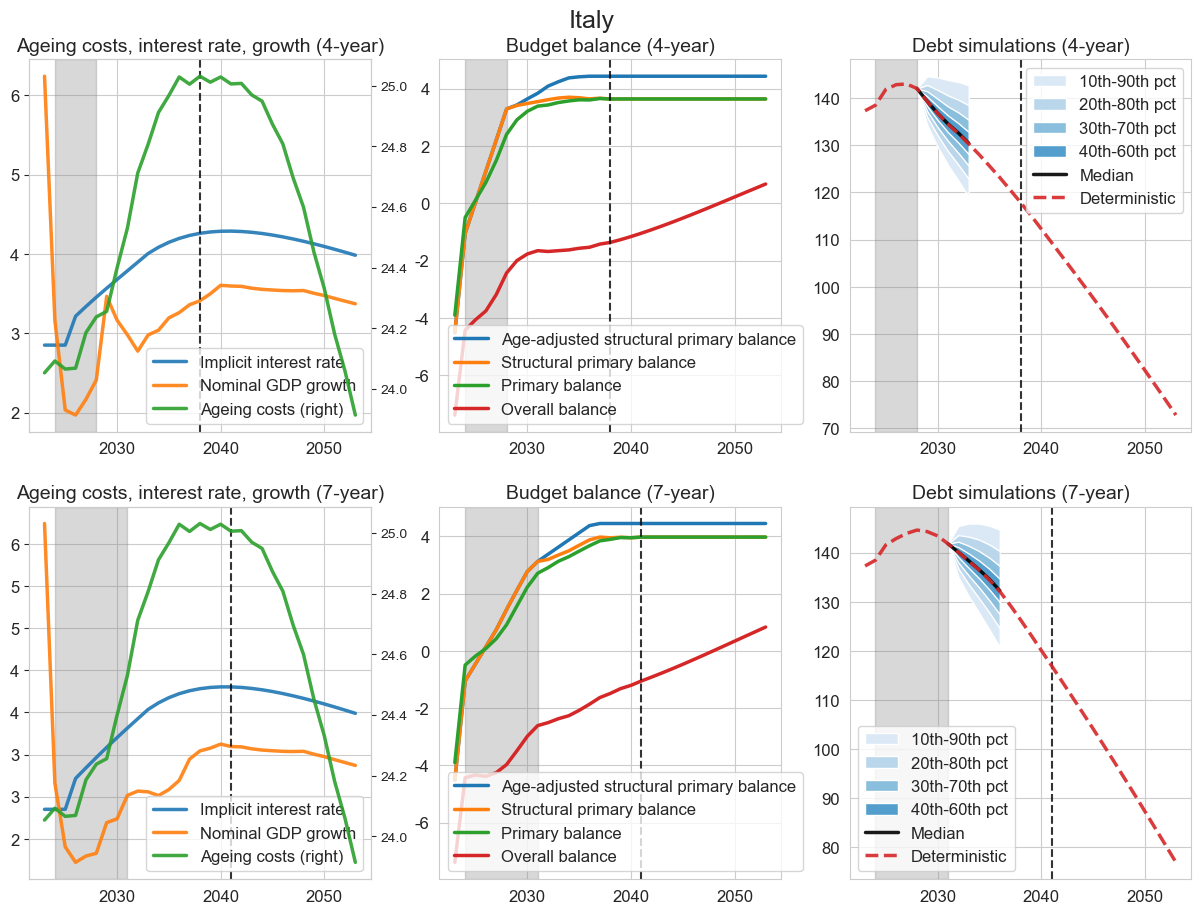

Creating chart for LVA_4
Creating chart for LVA_7


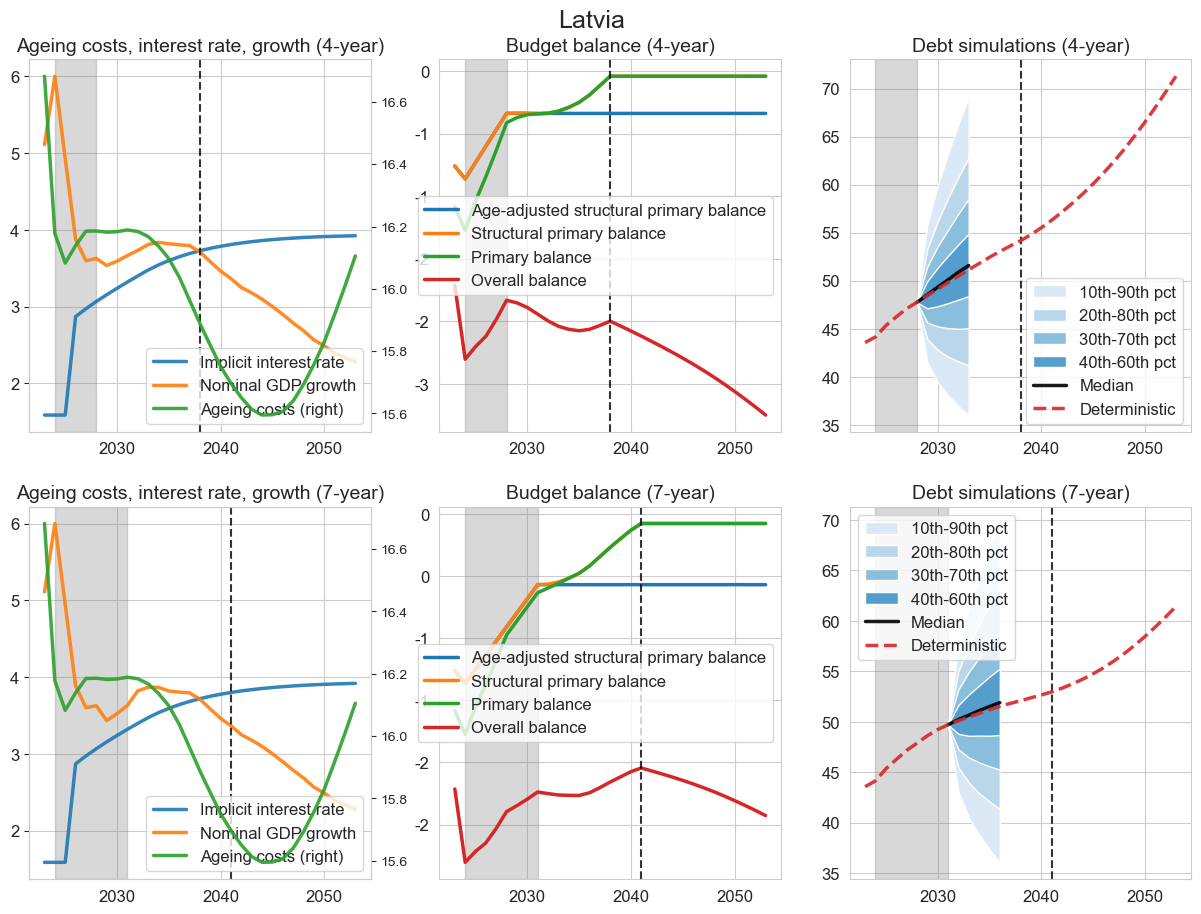

Creating chart for LTU_4
Creating chart for LTU_7


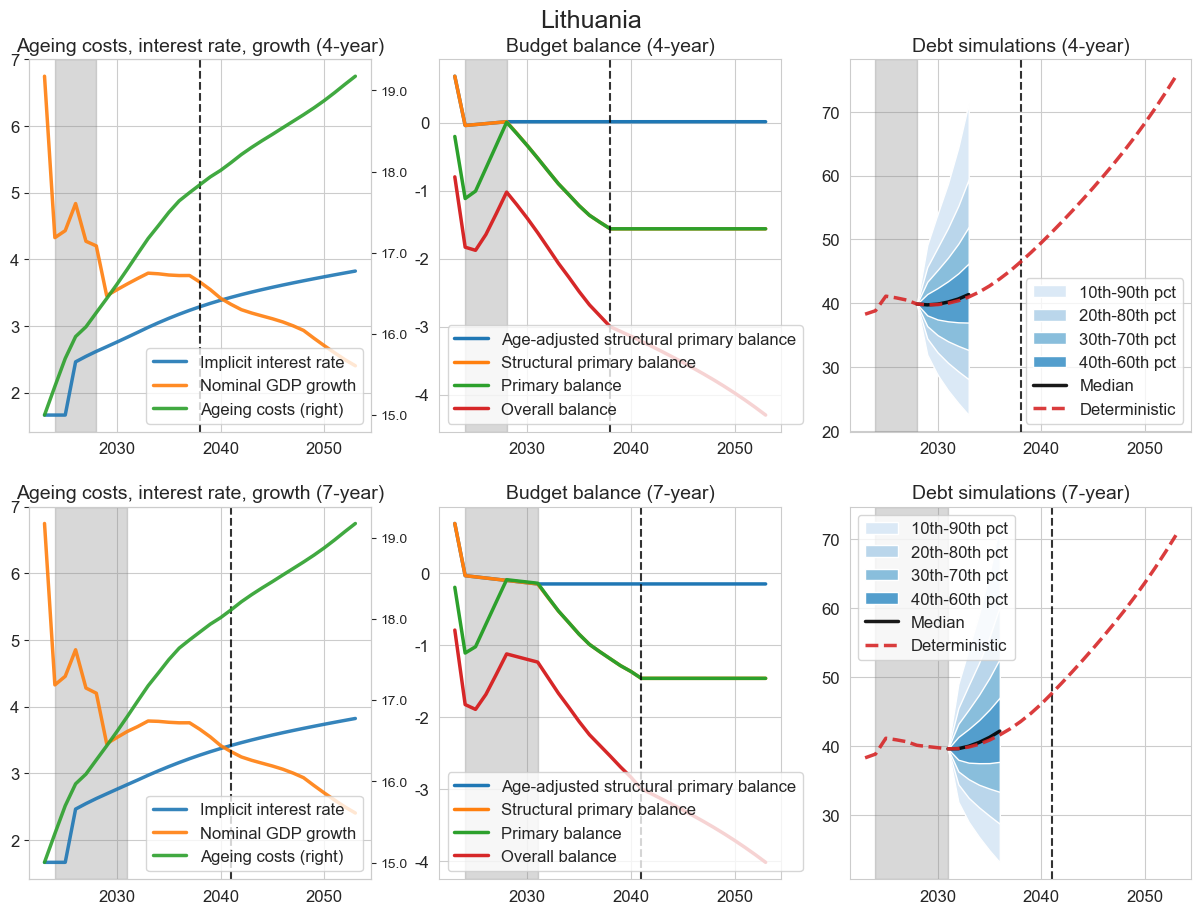

Creating chart for LUX_4
Creating chart for LUX_7


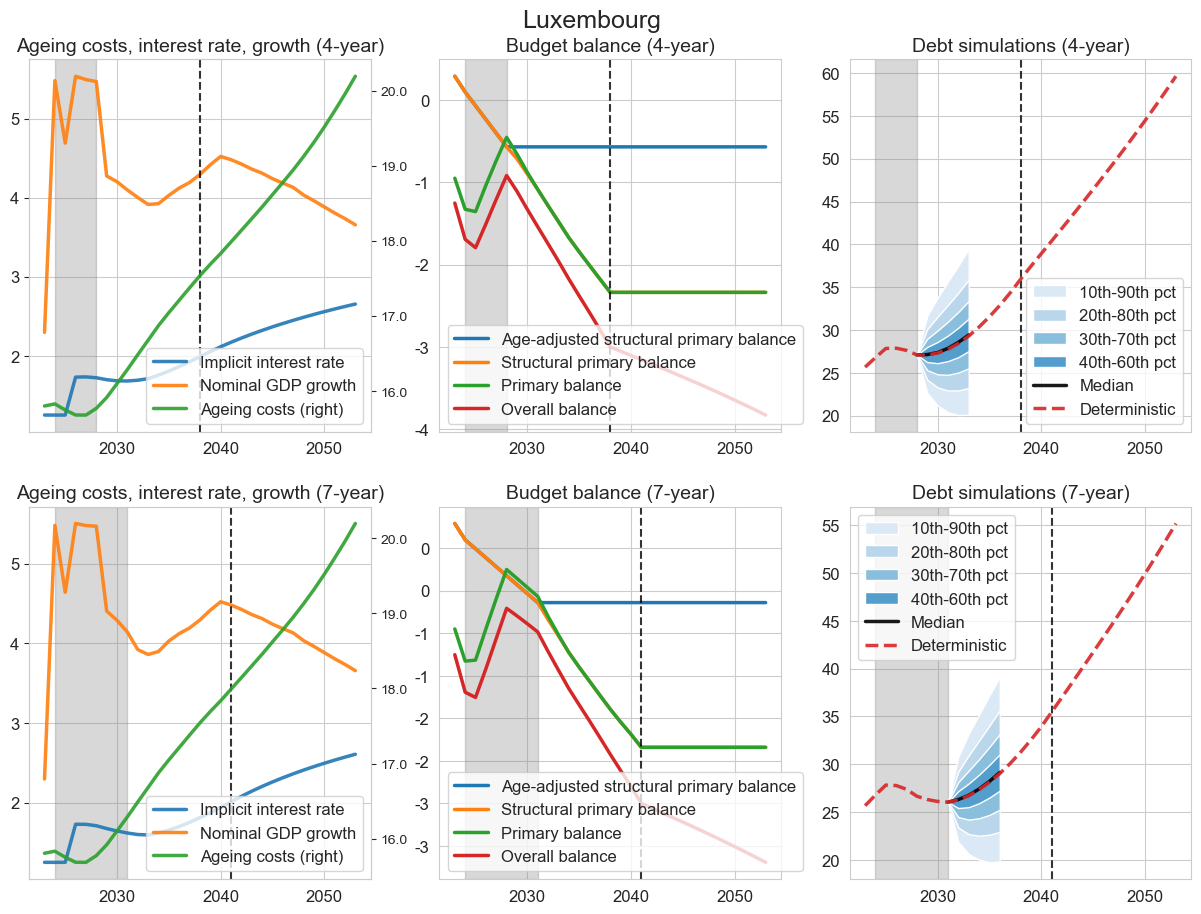

Creating chart for MLT_4
Creating chart for MLT_7


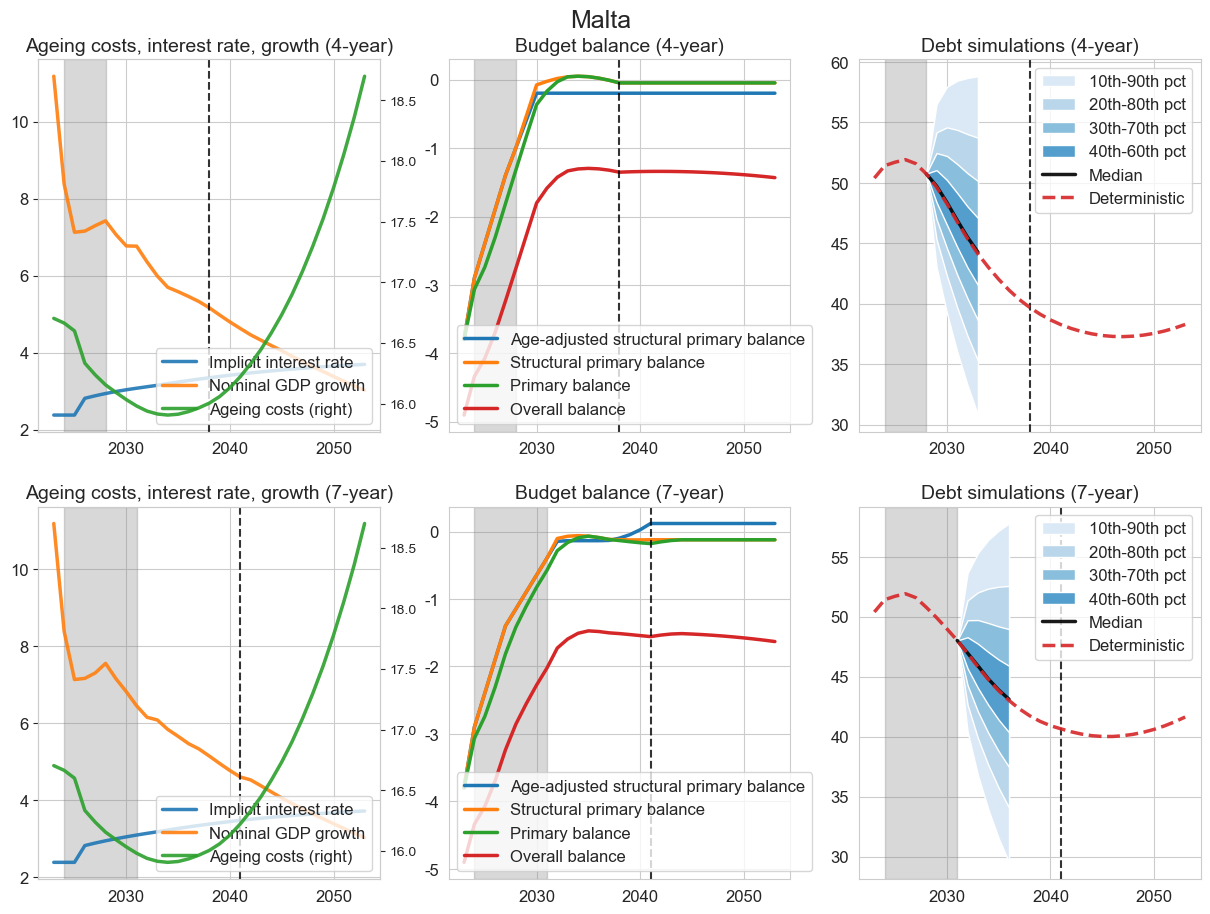

Creating chart for NLD_4
Creating chart for NLD_7


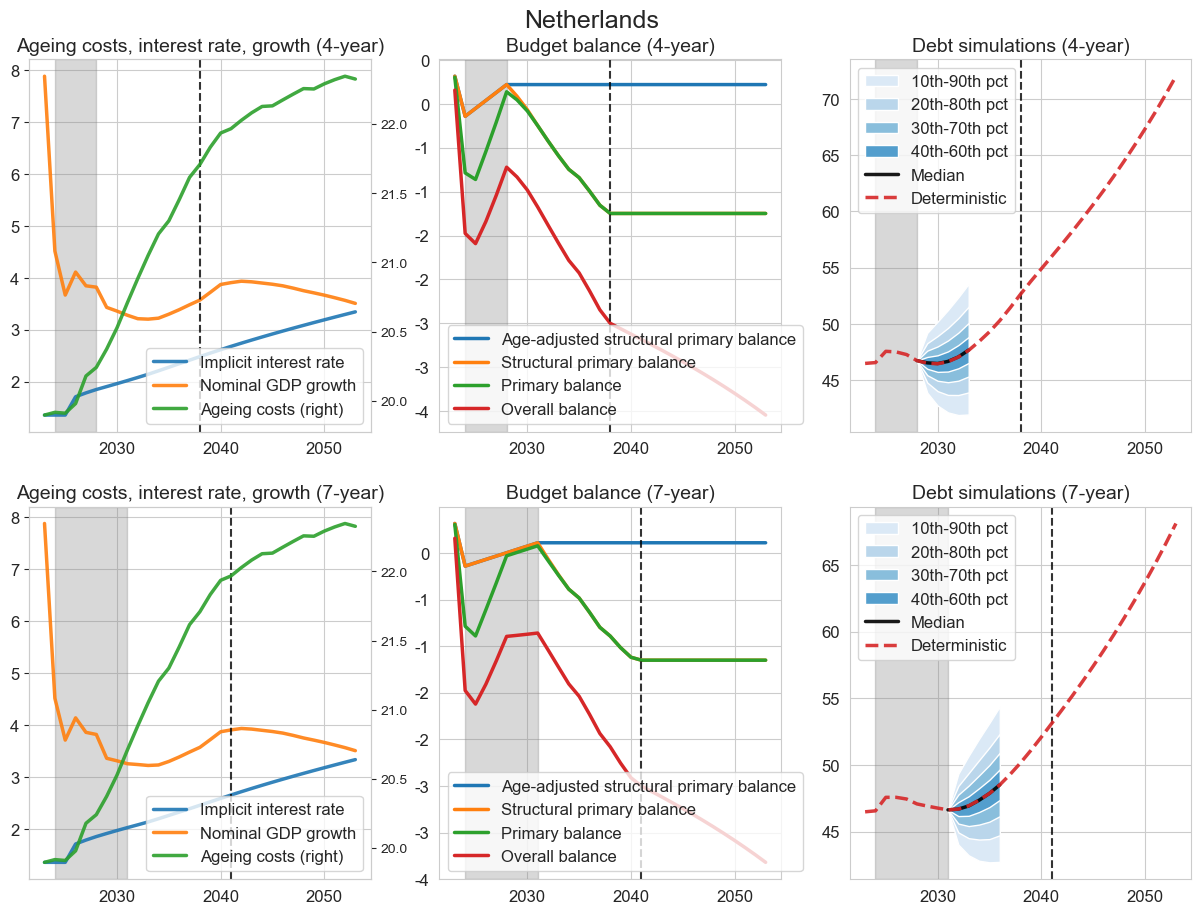

Creating chart for POL_4
Creating chart for POL_7


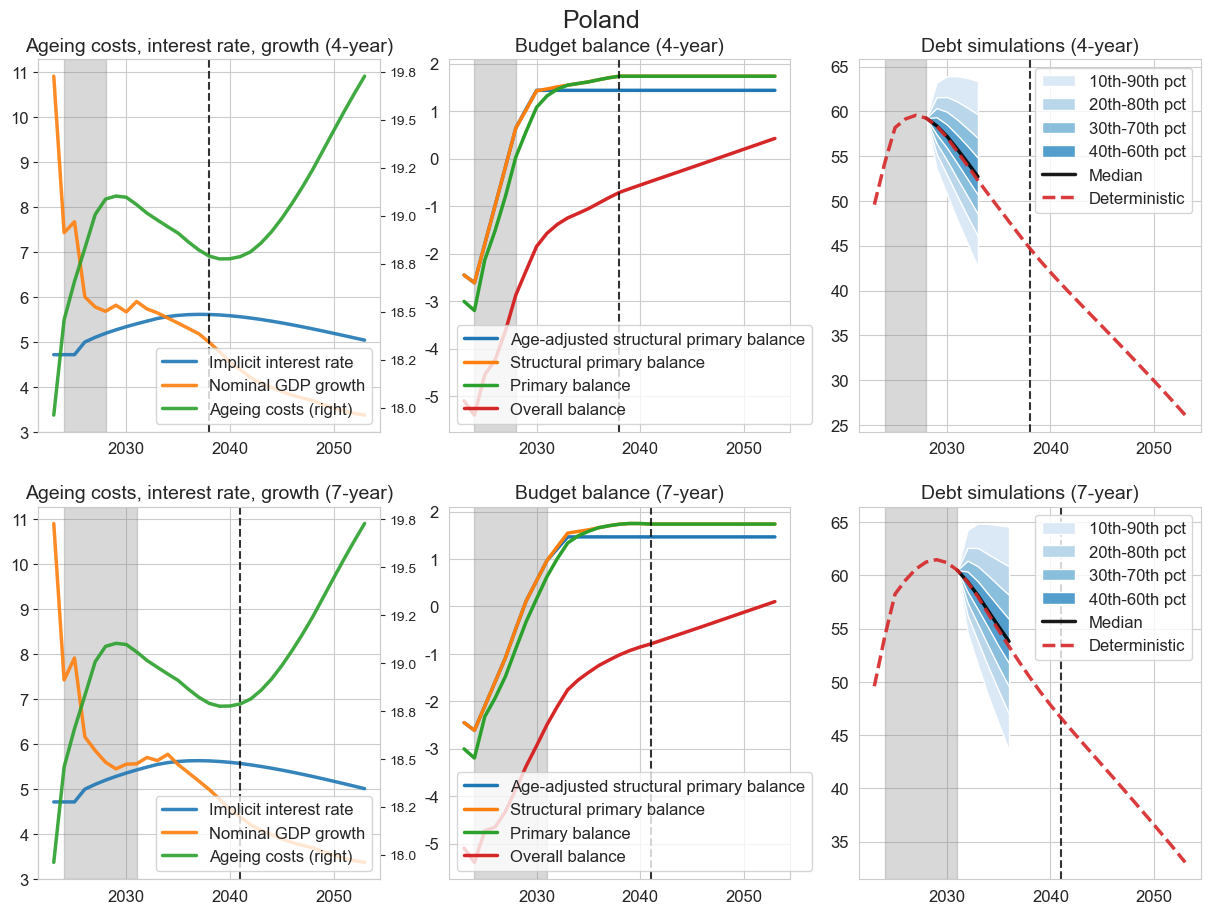

Creating chart for PRT_4
Creating chart for PRT_7


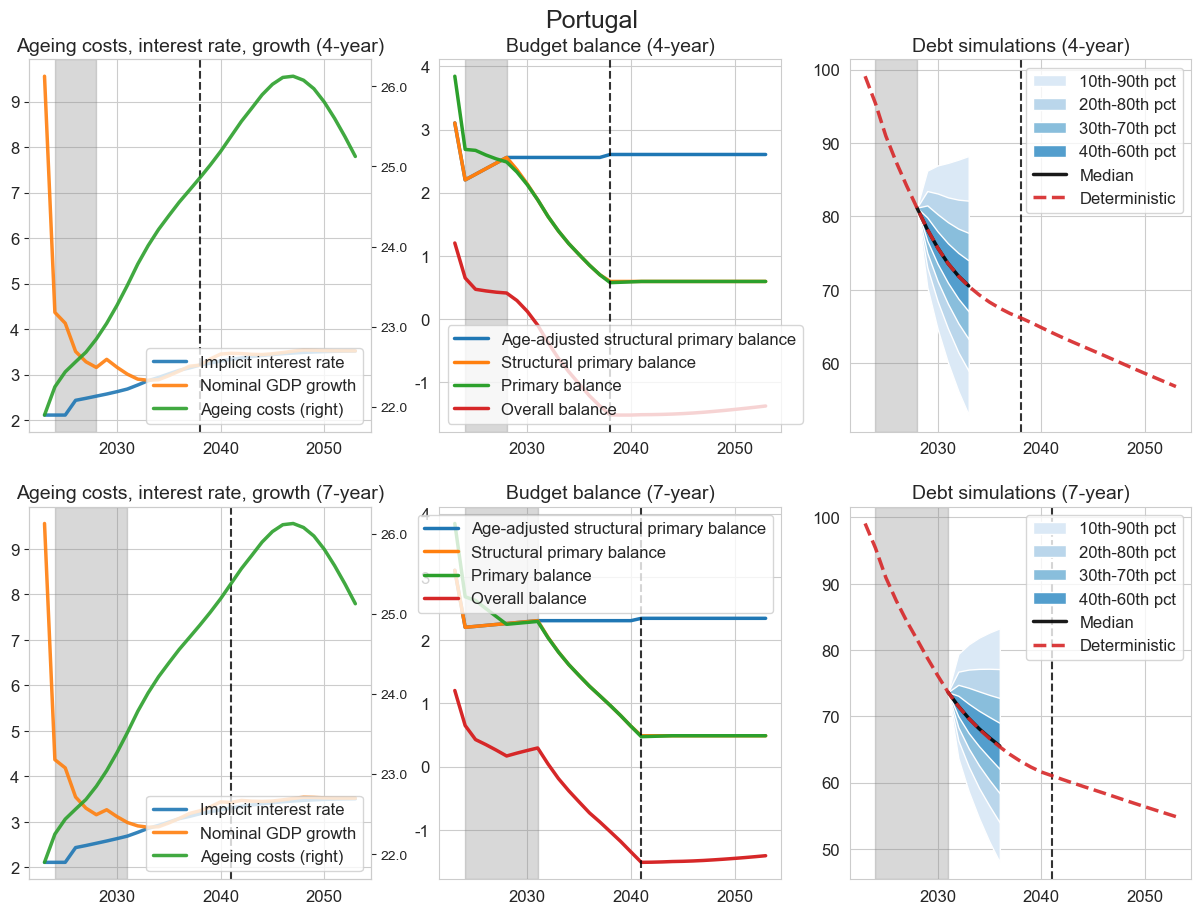

Creating chart for ROU_4
Creating chart for ROU_7


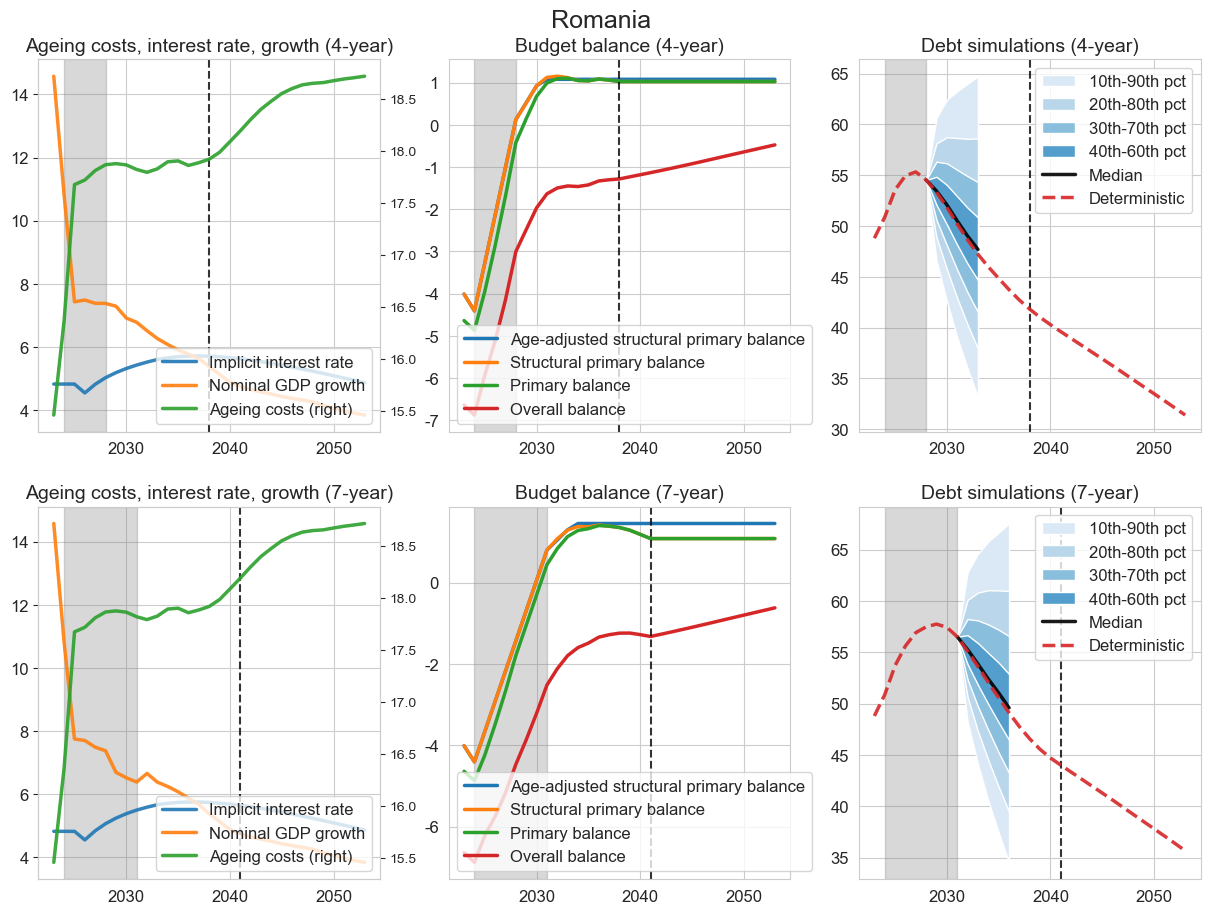

Creating chart for SVK_4
Creating chart for SVK_7


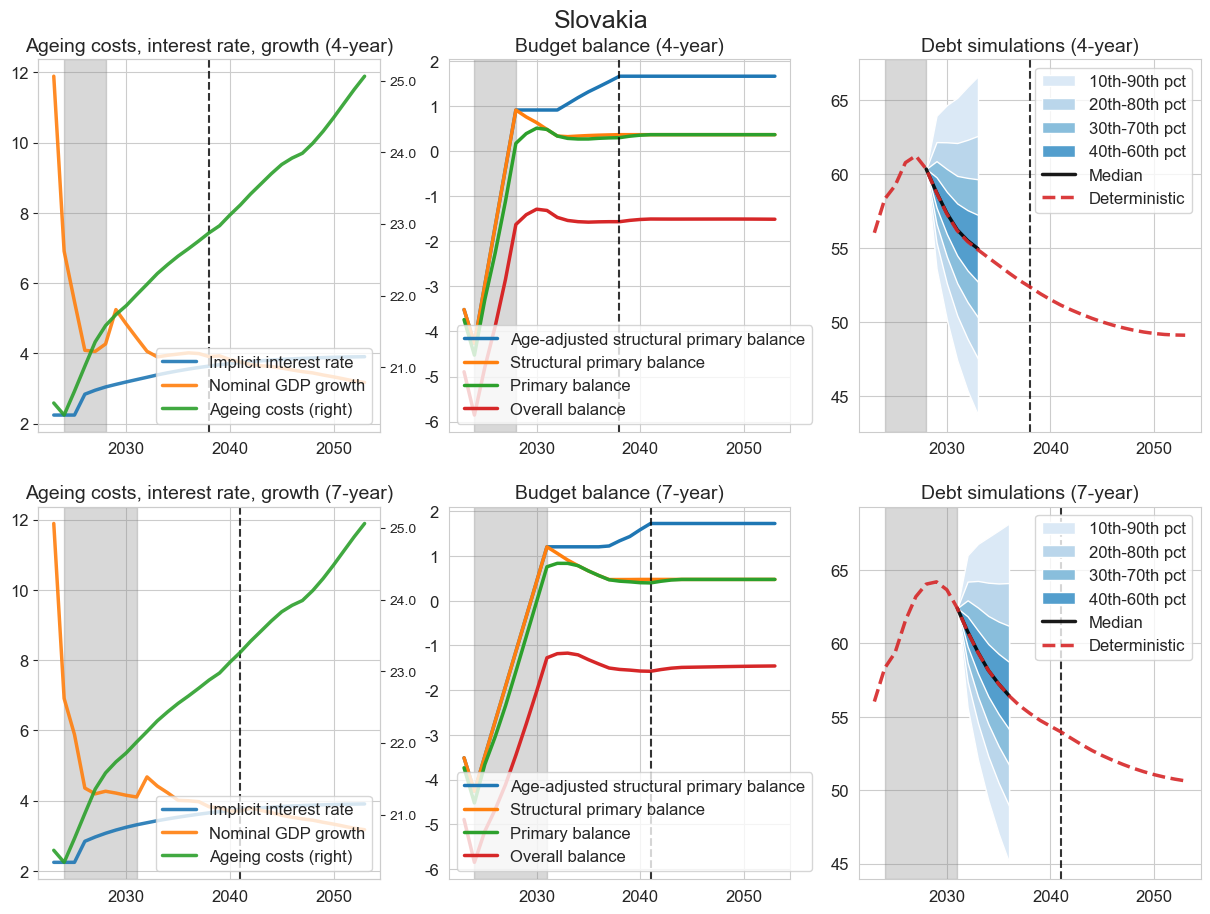

Creating chart for SVN_4
Creating chart for SVN_7


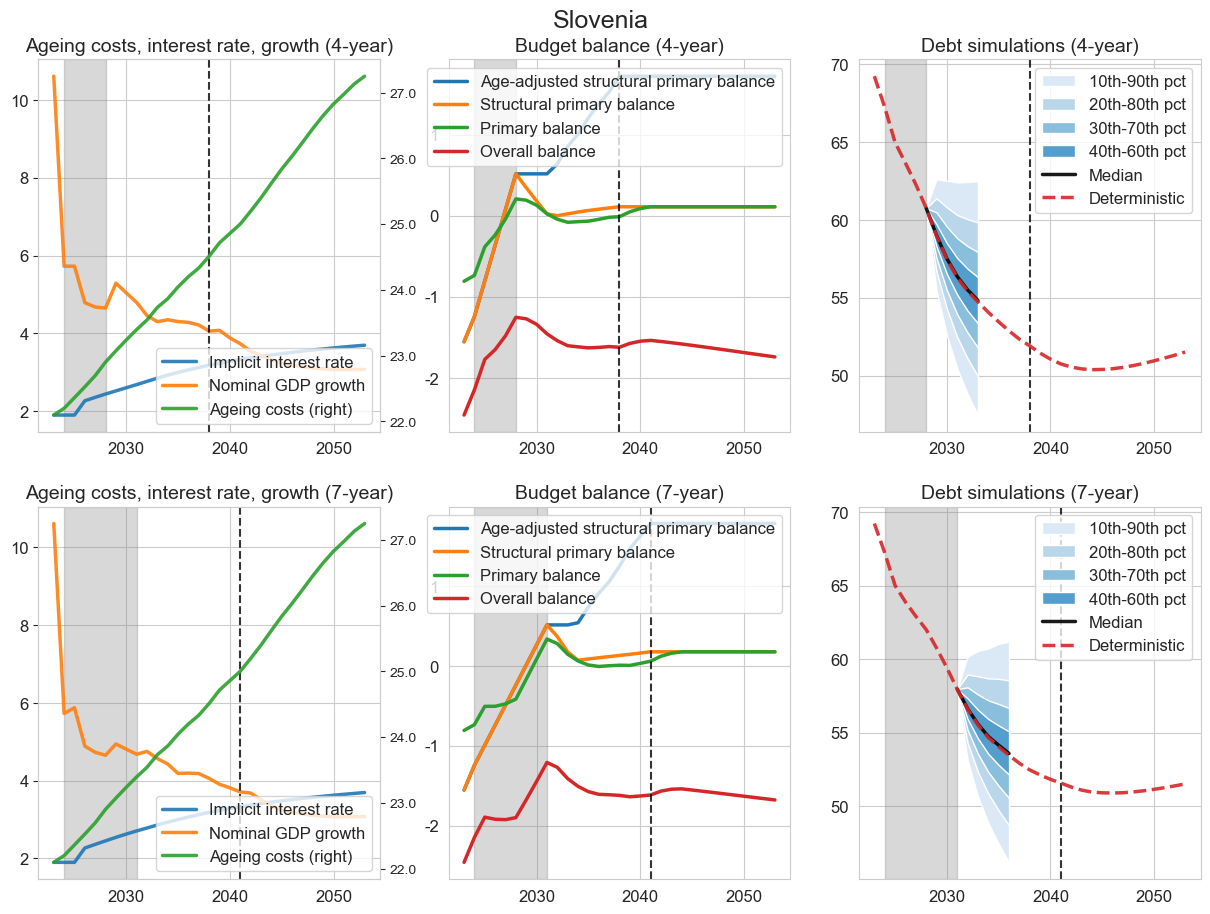

Creating chart for ESP_4
Creating chart for ESP_7


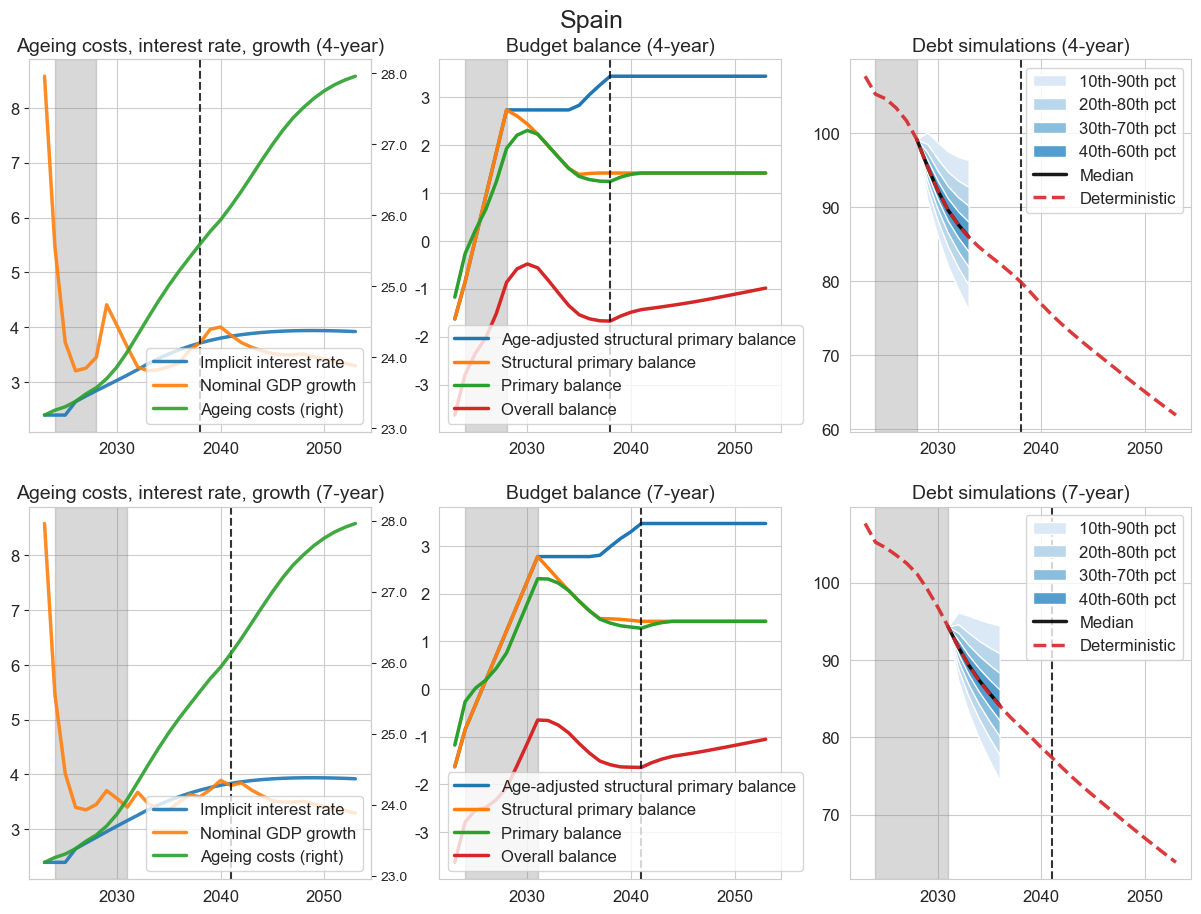

Creating chart for SWE_4
Creating chart for SWE_7


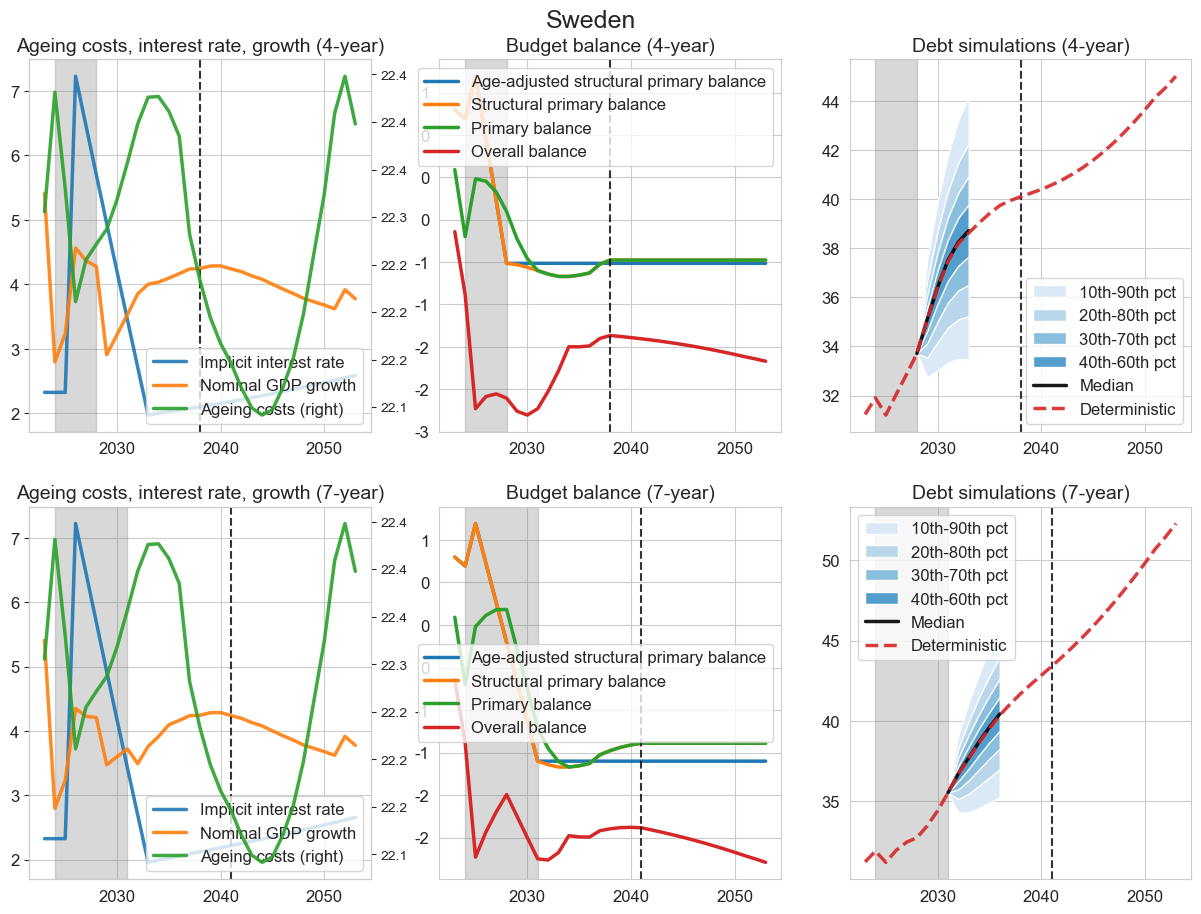

In [91]:
plot_annex_charts(results_dict, country_code_dict, folder_name, save_svg=False, save_png=True)

### Investment scenario
The new fiscal framework could have been made investment-friendlier by introducing a rule that would have exempted Council-approved public investment (public investment justifying an extension of the adjustment period) from the application of the safeguards and the minimum adjustment requirement under the deficit-based EDP. The DSA requirements and the requirement to lower or keep the deficit below 3 would continue to apply (hence, we speak of ‘a fiscally responsible public investment rule’). 

We simulate the impact of such temporary 0.5 percent of GDP extra investment for a period of six years (2025-2030) for the twelve EU countries that are expected to have higher than 60 percent of GDP public debt ratios in 2024. We present a baseline scenario (without a new public investment programme) and an investment scenario with a temporary new investment programme. The net surplus in investment relative to the baseline scenario in the twelve countries would amount to 2.7 percent of annual GDP or ca. 407 billion Euro in total over the six-year period. For the entire EU, net additional investment would amount to 2.8 percent of annual GDP or ca. 566 billion Euro, in total over the six-year period.

In [69]:
run_inv_scenario(
    country_codes=country_codes, 
    results_dict=results_dict, 
    folder_name=folder_name
    )


________________________ Optimizing AUT 7-year ________________________
SPB*: 0.5648999999998321 (adverse_r_g)
SPB post-adjustment: 0.6519662984691743

________________________ Optimizing BEL 7-year ________________________
SPB*: 1.1506999999998329 (adverse_r_g)
SPB post-adjustment: 1.3358080921742728

________________________ Optimizing BGR 7-year ________________________
SPB*: -1.6184000000001693 (deficit_reduction)
SPB post-adjustment: -0.947969448590585

________________________ Optimizing HRV 7-year ________________________
SPB*: 0.8172455635456264 (stochastic)
SPB post-adjustment: 1.3491718721204333
No quarterly shock data available for CYP, using annual data instead.

________________________ Optimizing CYP 7-year ________________________
SPB*: 0.09619999999983098 (lower_spb)
SPB post-adjustment: 0.14692944770898264

________________________ Optimizing CZE 7-year ________________________
SPB*: 0.7102999999998325 (deficit_reduction)
SPB post-adjustment: -1.0817690274312575

____

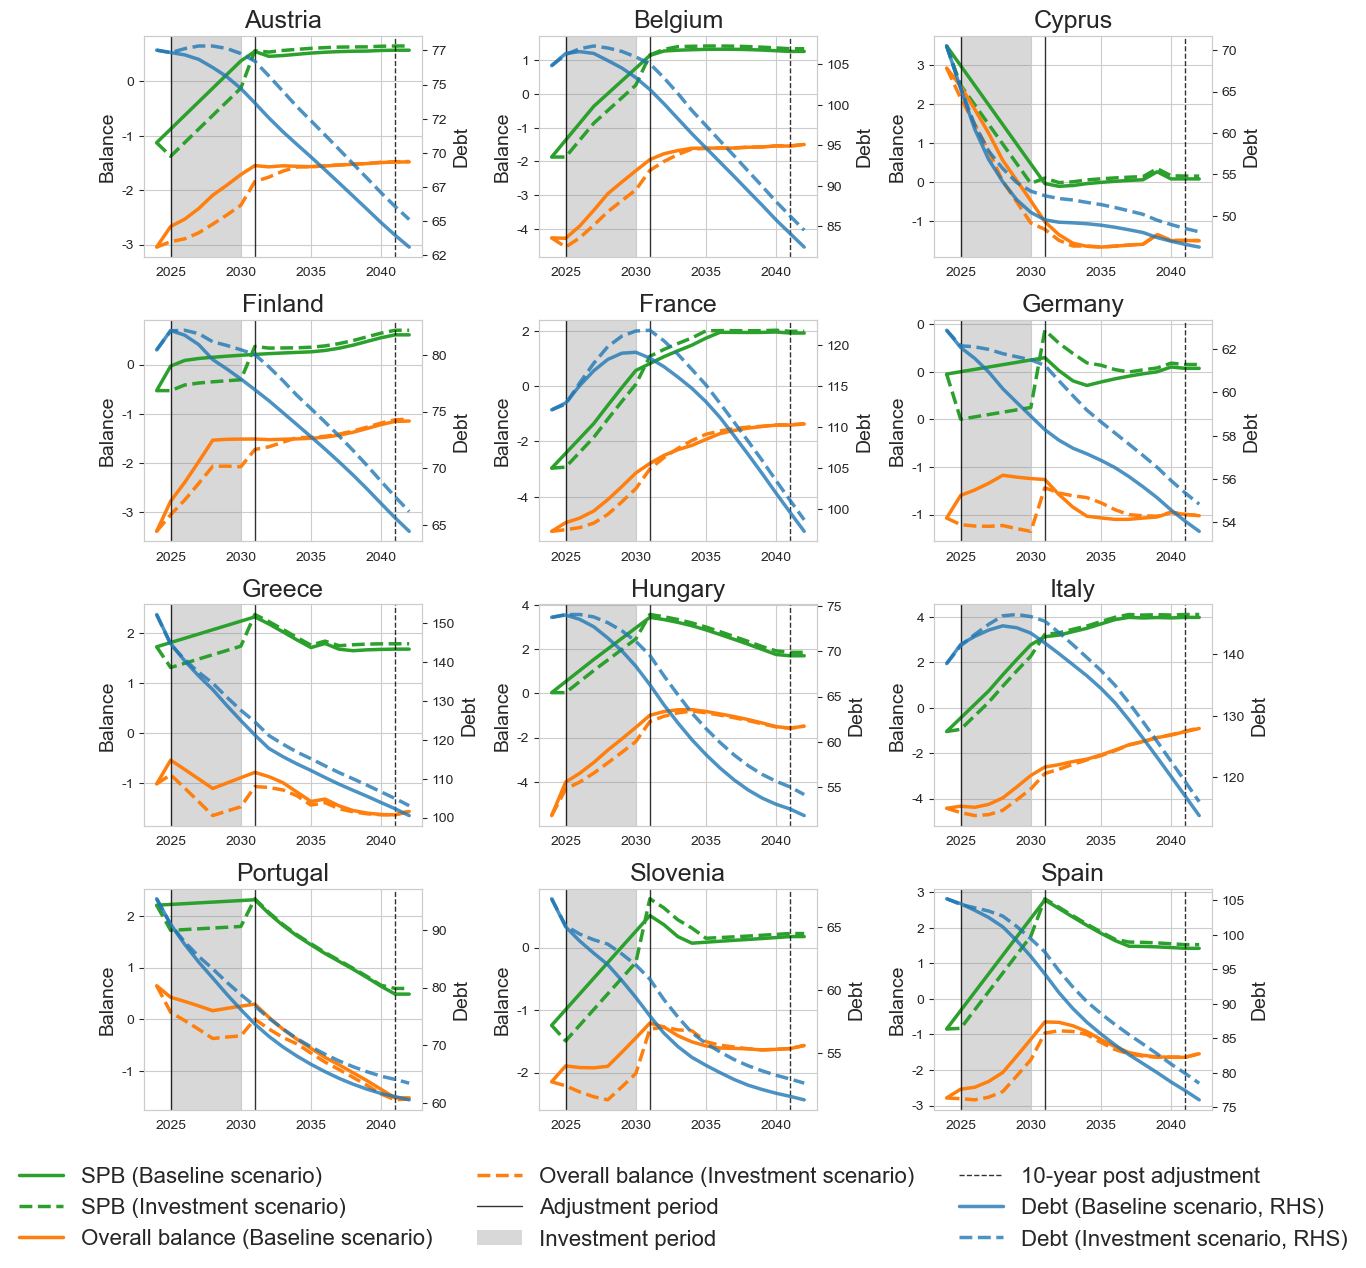

In [70]:
inv_country_dict = {
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'CYP': 'Cyprus',
    'FIN': 'Finland',
    'FRA': 'France',
    'DEU': 'Germany',
    'GRC': 'Greece',
    'HUN': 'Hungary',
    'ITA': 'Italy',
    'PRT': 'Portugal',
    'SVN': 'Slovenia',
    'ESP': 'Spain'
}
plot_inv(inv_country_dict, results_dict, folder_name, nrows=4, ncols=3, save_svg=False, save_png=True)